In [2]:
cd /Users/cl1704/PycharmProjects/clustering_in_rnns

/Users/cl1704/PycharmProjects/clustering_in_rnns


In [3]:
from Experiment_1.TwoAFCTask import generate_trials
#from Experiment_5.SiegelMillerTask import generate_trials
import networkx as nx
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from Experiment_1.net import *
import os
import statsmodels.api as sm
import scipy.optimize as opt
import math
#from psychometrics import *
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.cluster import KMeans
plt.rcParams["axes.grid"] = False
from sklearn.manifold import TSNE
matplotlib.rcParams['axes.linewidth'] = .5

In [4]:
def compute_var(variance,n):
    return np.sum(variance[n:])

def compute_p(k, null_k):
    return np.sum(null_k<k)/len(null_k)

In [9]:
df_list = []
for filename in os.listdir('Experiment_1/Results_1'):
    f = os.path.join('Experiment_1/Results_1', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list,ignore_index=True) 
original_df = original_df[original_df.mse_z<.035]
original_df = original_df[original_df.lambda_std==0.1]
original_df = original_df[original_df.sigma_rec==0.]

In [39]:
df = df.sort_values('k_inertia')
df[df.k_inertia>.15]

,model_id,w_rec,w_in,w_out,bias,mse_z,weight_decay,threshold,sigma_rec,lambda_std,...,lvar,dim,k,p_value,inertia,activity_std,null_inertia,variance,k_inertia,var
25397,jYnb1t49,"[[0.0, -0.015319939, -0.005429096, -0.00074349...","[[0.09416382, -0.08489626], [-0.064286545, 0.0...","[[0.092717834, -0.02782137, -0.0047635348, -0....","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.031556,0.001,0.05,0.0,0.1,...,0.443669,3,4,0.0,"[0.9257901806832111, 0.43208949465175106, 0.15...",0.033744168,"[[0.9945039823665199, 0.9925444660444008, 0.99...","[0.5194930437092231, 0.41627208080171024, 0.05...",0.150234,-4.882088
26567,01f2JQVy,"[[0.0, 0.03327231, -0.026236981, 0.03992407, 0...","[[0.07710718, -0.10512933], [-0.09913566, 0.07...","[[0.15284432, -0.08241582, 0.0813824, 0.019602...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.031341,0.001,0.05,0.0,0.1,...,0.816140,3,4,0.0,"[0.9152177725341627, 0.505907371151861, 0.1505...",0.037938055,"[[0.9966221883011726, 0.9860316757570887, 0.99...","[0.5280931288058935, 0.4008277993186166, 0.054...",0.150508,-4.129273
27006,AwC2OWe4,"[[0.0, 0.0049445895, -0.00094664324, -0.000950...","[[0.07681806, -0.078121215], [-0.00045214337, ...","[[0.0449669, 0.095191345, 0.011740451, -0.0057...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.028594,0.001,0.05,0.0,0.1,...,1.000000,3,4,0.0,"[0.9440105979617514, 0.4840859963011087, 0.150...",0.03820525,"[[0.999664775789095, 0.9958710801447168, 0.994...","[0.5006431125916794, 0.4351300676821557, 0.056...",0.150984,-4.877298
26980,rhkTViOU,"[[0.0, -0.01985171, -0.019152373, -0.018945273...","[[-0.00017043085, 0.0010328332], [0.06324735, ...","[[0.0004508284, 0.07575397, 0.1234843, 0.05664...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.032564,0.001,0.05,0.0,0.1,...,1.000000,3,4,0.0,"[0.9106046279119661, 0.5302962146879885, 0.151...",0.025274863,"[[0.9967385626284763, 0.9876249874331496, 0.99...","[0.5458191498670005, 0.38084036902286134, 0.07...",0.151013,-6.210400
12828,AvfFZAqS,"[[0.0, 0.05137866, -0.018137574, 0.029651294, ...","[[0.029173391, 0.0076649175], [0.18643485, 0.3...","[[0.046302184, 0.07666066, -0.060695123, 0.073...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.032706,0.001,0.05,0.0,0.1,...,-0.006225,3,5,0.0,"[0.8313486353914782, 0.22438213177393035, 0.15...",0.0068292227,"[[0.993594285135813, 0.9931359648983743, 0.994...","[0.637804213671332, 0.20930027179384833, 0.097...",0.151030,-2.885033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,TrTsiLPy,"[[0.0, 0.065707065, -0.021331094, 0.026969867,...","[[-0.49557042, 0.07904446], [0.14699034, 0.087...","[[0.03598884, 0.18201819, 0.068584375, -0.0556...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.028499,0.001,0.05,0.0,0.1,...,-0.666085,3,5,0.0,"[0.9203071350423117, 0.8346964459779254, 0.766...",0.02744277,"[[0.9883956582495792, 0.9863030104078783, 0.99...","[0.1349456012241902, 0.12034654736868285, 0.10...",0.766771,-0.444862
5361,5mEdpQ4v,"[[0.0, 0.063069716, 0.18544628, -0.046159737, ...","[[0.33686432, -0.6324757], [0.44959965, -0.532...","[[0.08613065, 0.007467267, -0.056607123, 0.097...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.028879,0.001,0.05,0.0,0.1,...,-0.816140,3,5,0.0,"[0.9149015835580915, 0.8292824395528439, 0.768...",0.02726848,"[[0.9860561374196658, 0.9923891065102859, 0.98...","[0.13818979958520275, 0.12667976717486537, 0.1...",0.768778,-0.466658
5362,wAdZIVLi,"[[0.0, -0.1076642, -0.007848445, 0.011482217, ...","[[-0.26900837, 0.5119223], [-0.013000042, -0.0...","[[0.084756315, -0.024454063, 0.00209977, -0.04...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.029998,0.001,0.05,0.0,0.1,...,-0.816140,3,5,0.0,"[0.9106878346385844, 0.8343487289262704, 0.778...",0.026717903,"[[0.9911940952934171, 0.9909906916666164, 0.99...","[0.13299874817102986, 0.1249569637083314, 0.10...",0.778017,-0.451453
4949,m7OvrOUh,"[[0.0, -0.06623228, 0.01992941, -0.19070785, -...","[[0.4327306,

0.0037213935218294537
0.15187660901349642
0.19249285300925925
0.2536002310647881
0.4009536747685185
0.4939853009259259
0.6126490871121628
0.691719675925926
0.7349008680555555


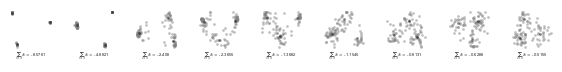

In [41]:
# Trial data for simulations
u, z, mask, conditions  = generate_trials(
                                    n_trials=100)



fig = plt.figure(figsize=(7,.5))
gs = gridspec.GridSpec(1,9,wspace = .5)

# Load data for row
df =original_df.copy()

k = 3
df  = df[df.dim==k]
#df = df[df.k>=dim]
df['k_inertia'] = df.inertia.apply(lambda x: x[k-1])
df['var'] = df.variance.apply(lambda x: compute_var(x,k))
df['var'] = np.log(df['var'])
df = df.sort_values('var',ascending=True)
#bins = np.linspace(-3,-.75,9)

# 
# df['bin'] = pd.cut(df['var'],bins=bins)
# df['mean'] = df.bin.apply(lambda x: np.mean([x.left,x.right]))
# df['mean'] = df['mean'].astype(float).round(3)
# bin_means = np.sort(df['mean'].unique())
# For rates:
idx = [25809,25397,12814,13614,12142,9549,10757,9035,7169]

#bins = [0,.025,.05,.1,.2,.3,.4,.5,.6]
for col in range(9):
    # Create axis
    ax=fig.add_subplot(gs[0,col])
    # Load model data for column
    
    model_id = df[df.index==idx[col]].model_id.values[0]
    #model_id  = df[ (df['mean'] ==bin_means[col] )].sort_values('var')['model_id'].values[1]
    model_data = df[df.model_id==model_id]
    #k = model_data['k'].item()
    k = 3
    # Simulate model
    net = Net(n=100,input_size = 2,dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())


    x = net(u).detach().cpu().numpy()

    
    rows = []
    for trial in range(u.shape[0]):
        rows.append({'trial': trial,
                     'motion': conditions[trial]['motion_coh'],
                     'response': x[trial, :, :]})
    model_df = pd.DataFrame(rows)
    model_df = model_df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()

    responses = np.stack(model_df.response.values)
    responses = responses.reshape(-1, responses.shape[2]).T

    # z_score
    responses = (responses - np.mean(responses, axis=1, keepdims=True)) / np.std(responses, axis=1, keepdims=True)
    responses = responses[~np.isnan(responses).any(axis=1)]
    
    #responses = .001 * (2*np.random.rand(responses.shape[0],responses.shape[1])-1)
    total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)

    clustering = KMeans(n_clusters=k,n_init='auto').fit(responses)
    labels  = clustering.labels_
    print(clustering.inertia_/total_variance)

    #responses  = responses + .5*(2*np.random.rand(responses.shape[0],responses.shape[1])-1)
    
    X = responses
    y = labels
    lda = LinearDiscriminantAnalysis(solver='eigen',  shrinkage=9e-1)
    
    # parameters = {'tol':10**np.linspace(-2,-.5,25)}
    # from sklearn.model_selection import GridSearchCV
    # clf = GridSearchCV(lda, parameters,refit=True,error_score = np.nan,cv=5)
    # clf.fit(X, y)
    # lda = clf.best_estimator_
    x_proj = lda.fit_transform(X,y)
    

        
    centers_proj = lda.transform(clustering.cluster_centers_)
    #scale = np.sum(PCA().fit(centers_proj).explained_variance_[:2])/100
   
    
    
    #x_proj = x_proj + 1*(2*np.random.rand(x_proj.shape[0],x_proj.shape[1])-1)
    network_pal = sns.husl_palette(pd.Series(np.sort(labels)).unique().size,s=1)
    
    lut = dict(zip(pd.Series(np.sort(labels)).unique(),network_pal))
    row_colors = pd.Series(np.sort(labels)).map(lut)
    
    sns.scatterplot(x=x_proj[np.argsort(labels), 0], y=x_proj[np.argsort(labels), 1], color='gray',s=3,alpha=.5,ax=ax,edgecolor=None)
    sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k',s=3,alpha=.5,ax=ax,edgecolor=None)

    # Make axis pretty
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlabel("PC 1",fontsize=6)
    ax.set_ylabel("PC 2",fontsize=6)
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6,bottom=False)
    ax.yaxis.set_tick_params(labelsize=6,left=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.text(.5,-.2,r'$\sum_{i>3}\lambda_i = $'+' '+str(np.round(model_data['var'].item(),4) ), horizontalalignment='center',
 verticalalignment='center', transform=ax.transAxes,fontsize = 3)
    
fig.savefig('Figures/SIFig_2afcclustering.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight')
